# *Projek Rekomendasi*

---



**Nama : Ardiansyyah Putra**

**dataset diambil dari** : https://www.kaggle.com/datasets/saurabhbagchi/books-dataset

___
# Importing Libraries and Dataset

## Importing Libraries

Pada notebook ini saya melakukan import pada beberapa libraries, seperti pandas, numpy, tenserflow, dll.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


load dataset dengan API Kaggle

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'hyotoo'
os.environ['KAGGLE_KEY'] = '4fa09ef5ec8c7973cf7d763bafbada38'

# **Load Dataset**

In [3]:
!kaggle datasets download -d saurabhbagchi/books-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhbagchi/books-dataset
License(s): CC0-1.0


unzip dataset hasil download

In [4]:
!unzip books-dataset.zip

Archive:  books-dataset.zip
  inflating: books_data/books.csv    
  inflating: books_data/ratings.csv  
  inflating: books_data/users.csv    


## Importing Dataset

Pada notebook ini, hanya akan menggunakan dataframe book dan rating untuk content based dan collaborative filtering recommendation

In [5]:
df1 = pd.read_csv("/content/books_data/books.csv", encoding='ISO-8859-1', sep=';', on_bad_lines='skip')
df2 = pd.read_csv("/content/books_data/ratings.csv", encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

<ipython-input-5-ae5630958e66>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/books_data/books.csv", encoding='ISO-8859-1', sep=';', on_bad_lines='skip')


# **Data Understanding**

In [6]:
df1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


data dari dataframe books memiliki 271360 baris dan 8 koolom data

Meneliti ukuran dari dataframe rating

In [8]:
df2

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
df2.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


data dari dataframe rating memiliki 11449780 baris dan 3 koolom data

rating 0 dalam data sangat banyak, dan saya memilih untuk mennghapusnya


# Data Preprocessing

Memberi nama header baru pada kolom Book-Rating dan User-ID pada df2

In [11]:
df2 = df2.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})

Melihat dari dataframe dari rating dan books terbilang banyak, di sini hanya diambil 30000 row dari book dataset dan 20000 row untuk rating dataset jadi masih terllihat cukup banyak

In [12]:
df1 = df1[:30000]
df2 = df2[:20000]

In [13]:
df2 = df2.drop(df2[df2.rating == 0].index)

melakukan drop atau pembuangan pada row - row yang merupakan duplikasi dari row - row yang lain, sehingga dataset kita tetap memiliki integritas dan tidak berulang

In [14]:
df1 = df1.dropna()
df2 = df2.dropna()

In [15]:
df2 = df2.drop_duplicates()
df1 = df1.drop_duplicates()

In [16]:
df1.shape

(30000, 8)

In [17]:
df2.shape

(7340, 3)

setelah pengahpusan rating 0 data menjadi menjadi 7340

5 data teratas dari dataset rating

In [18]:
df2.head()

,user_id,ISBN,rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


5 data teratas dari dataset buku

In [19]:
df1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Memberi nama header baru pada kolom Book-Title, Book-Author, Image-URL-S, Image-URL-S,Image-URL-M,Image-URL-L pada book_dataset menjadi huruf kecil

In [20]:
df1 = df1.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

## Univariate Data Analys

Meneliti distribusi rating dari rating dataframe dengan Barplot

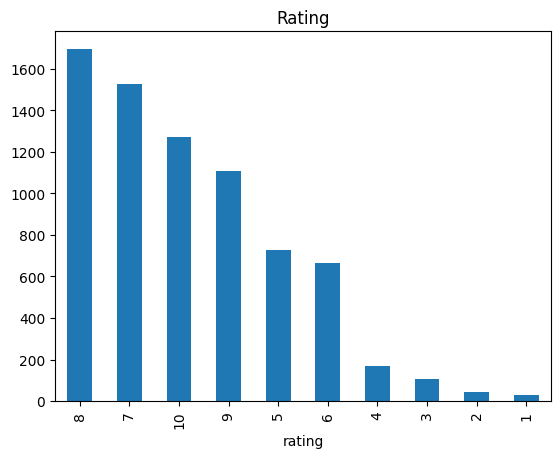

In [21]:
count = df2["rating"].value_counts()
count.plot(kind='bar', title="Rating");

plt.show()

rata rata user memberikan rating 8.0

Meneliti distribusi tahun terbitnya buku dari book dataframe dengan Barplot

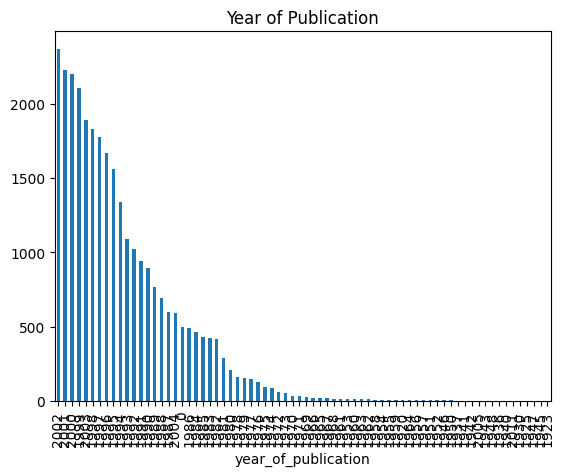

In [22]:
count = df1["year_of_publication"].value_counts()
count.plot(kind='bar', title="Year of Publication");

plt.show()

dari data tersebut dapat diketahui banyak buku yang terbit pada tahun 2002

## Multivariate Analysis

Melihat pairplot yang ada pada rating dataset

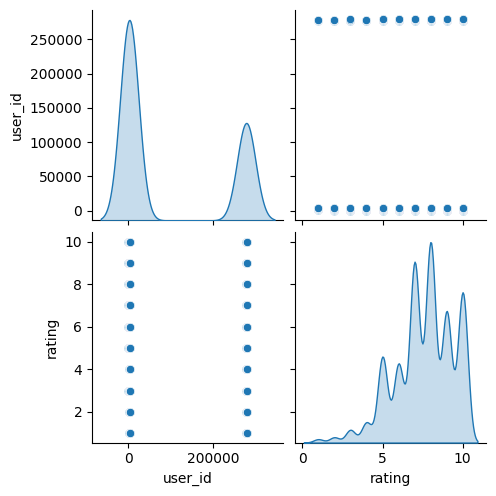

In [23]:
import seaborn as sns
sns.pairplot(df2, diag_kind = 'kde')

___
# Content Based Filtering

Content-Based Filtering adalah metode sistem rekomendasi yang memberikan rekomendasi kepada pengguna berdasarkan karakteristik atau atribut dari item (konten) yang disukai atau pernah dinikmati oleh pengguna tersebut sebelumnya.

## Data Preparation

perlu mengubah dataframe dari buku menjadi sebuah list

In [24]:
book_ISBN = df1['ISBN'].tolist()

book_title = df1['book_title'].tolist()

book_author = df1['book_author'].tolist()

book_year_of_publication = df1['year_of_publication'].tolist()

Setelah kita membuat list, kita perlu membuat dictionary yang digunakan untuk memnentukan pasangan key-value pada book_ISBN, book_title, book_author, dan book_year_of_publication.

In [61]:
book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
29995,1887006036,Values-Based Financial Planning : The Art of C...,Bill Bachrach,2000
29996,0793144337,Attract and Retain the Affluent Investor: Winn...,Stephen Gresham,2001
29997,0967450608,The Brand Called You for Financial Advisors,Peter Montoya,1999
29998,0737306173,25 Stupid Mistakes You Don't Want to Make in t...,David E. Rye,2001


## Modeling

Pada content Based Filtering, kita akan menggunakan TF-IDF Vectorizer untuk membangun sistem rekomendasi berdasarkan penulis buku.

TF-IDF yang merupakan kepanjangan dari Term Frequency-Inverse Document Frequency memiliki fungsi untuk mengukur seberapa pentingnya suatu kata terhadap kata - kata lain dalam dokumen.
Kita umumnya menghitung skor untuk setiap kata untuk menandakan pentingnya dalam dokumen dan corpus.

Pada cell code di bawah ini kita akan mengambil kata - kata penting dalam kolom book_author

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(book['book_author'])

tf.get_feature_names_out()

array(['aa', 'aaron', 'aarsen', ..., 'â¼scher', 'â¼skind', 'â¼ter'],
      dtype=object)

Kemudian kita akan lakukan fit dan transformasi ke dalam matriks, pada code di bawah ini, matriks tersebut adalah tfidf_matrix

In [27]:
tfidf_matrix = tf.fit_transform(book['book_author'])

tfidf_matrix.shape

(30000, 11444)

Pada tfidf_matrix terdapat 30000 ukuran data dan 11444 nama penulis buku


.todense(), atribut ini dipakai untuk mengubah tfidf_matrix yang awalnya vektor menjadi matriks

In [28]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Dataframe di bawah ini digunakan untuk melihat matriks dari judul buku dengan penulis - penulis buku

In [29]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=book.book_title
).sample(10, axis=1,replace=True).sample(20, axis=0)

,jeannette,cymbala,hamilton,suzann,divakaruni,byrd,bache,cajio,nykanen,chopra
book_title,,,,,,,,,,
The Name of the Rose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Tomb (Adversary Cycle/Repairman Jack),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stranger In the Mirror,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flaubert's Parrot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fierce Creatures: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Los De Abajo (Letras hispÃ¡nicas),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What Witches Do,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Visionary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
It'S A Miserable Life!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dalam sistem rekomendasi, kita perlu mencari cara supaya item yang kita rekomendasikan tidak terlalu jauh dari data pusat, oleh karena itu kita butuh derajat kesamaan pada item, dalam proyek ini, buku dengan derajat kesamaan antar buku dengan cosine similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada code di bawah ini kita akan membuat dataframe cosine_sim_df dengan baris dan kolomnya adalah judul dari buku

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (30000, 30000)


book_title,Ravelstein,To the Pole: Five Women in Search of an Adventure,The Indian in the Cupboard (rack) (Indian in the Cupboard),The Dark Child : The Autobiography of an African Boy,Home Run (Harvest Original)
book_title,,,,,
The Darwin Awards: Evolution in Action,0.0,0.0,0.0,0.0,0.0
Hautfarbe Nebensache. ( Ab 13 J.).,0.0,0.0,0.0,0.0,0.0
The Time Traveler's Wife (Today Show Book Club #15),0.0,0.0,0.0,0.0,0.0
Virgin Earth,0.0,0.0,0.0,0.0,0.0
"Maximarketing: The New Direction in Advertising, Promotion and Marketing Strategy",0.0,0.0,0.0,0.0,0.0
Holocaust in Kambodscha (Spiegel-Buch),0.0,0.0,0.0,0.0,0.0
Plumbing for Willy (Select Sound Buys),0.0,0.0,0.0,0.0,0.0
The Pleasure of His Company: A Kendra Clayton Mystery,0.0,0.0,0.0,0.0,0.0
Understanding Variation: The Key to Managing Chaos (2nd Edition),0.0,0.0,0.0,0.0,0.0


Di bawah ini adalah fungsi untuk mendapatkan rekomendasi berbasis penulis buku dengan k sebagai jumlah rekomendasi yang diingkan, dalam fungsi ini, kita akan mendapatkan 3 rekomendasi

Atribut argpartition berguna untuk mengambil sejumlah nilai k, dalam fungsi ini 5 tertinggi dari tingkat kesamaan yang berasal dari dataframe cosine_sim_df.

In [32]:
def author_recommendations(i, M, items, k=10):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Pada code cell di bawah ini, kita akan mencari rekomendasi dari buku yang sudah dibaca, dalam kasus ini, buku yang sudah dibaca adalah "Spider-Man" yang ditulis oleh Peter David dan terbit pada tahun 2002

In [33]:
books_that_have_been_read = "Spider-Man"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
22773,0345450051,Spider-Man,Peter David,2002


Pada cell code di bawah ini, kita akan mendapatkan 5 rekomendasi dari buku "The Diaries of Adam and Eve"

In [34]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])

Pada beberapa kasus, rekomendasi akan memberikan rekomendasi yang terduplikat, sehingga perlu dibuang rekomendasi yang terduplikat

In [35]:
recommendations = recommendations.drop_duplicates()

Berikut adalah 10 buku rekomendasi yang ditulis oleh Peter David

In [36]:
recommendations

,book_title,book_author
0,Star Trek Gateways : What Lay Beyond,Peter David
1,Restoration (Star Trek New Frontier: Excalibur...,Peter David
2,Hulk,Peter David
3,Imzadi II: Triangle (Star Trek The Next Genera...,Peter David
4,Sir Apropos of Nothing,Peter David
5,A Rock and a Hard Place (Star Trek The Next Ge...,Peter David
6,"Strike Zone (Star Trek The Next Generation, No 5)",Peter David
7,Vendetta: The Giant Novel (Star Trek the Next ...,Peter David
8,"The Captain's Daughter (Star Trek, Book 76)",Peter David
9,A Second Chance at Eden,Peter F. Hamilton


## Evaluation

Kita akan memakai metrik evaluasi Precision@k di mana:

Jumlah rekomendasi yang relevan / jumlah total buku relevan dalam dataset

Variabel books_that_have_been_read_row di bawah ini akan mengambil satu row dari buku yang pernah dibaca sebelumnya, dan variabel books_that_have_been_read_author adalah penulis buku dari buku yang pernah dibaca sebelumnya

In [37]:
books_that_have_been_read_row = df1[df1.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

relevant_recomendations menunjukan buku yang relevan dari rekomendasi yang diberikan

In [38]:
# Ambil rekomendasi yang relevan (dari author yang sama)
relevant_recommendations = recommendations[recommendations.book_author == books_that_have_been_read_author]

# Hitung Precision@k
k = recommendations.shape[0]
precision_at_k = (relevant_recommendations.shape[0] / k) * 100
print(f"Precision@{k}: {precision_at_k:.2f}%")


Precision@10: 90.00%


hal ini karena dari top 10 rekomendasi ada satu buku yang bukan Peter David authornya

___
# Collaborative Filtering


## Data Preparation

Pada cell code di bawah ini, saya akan meyandikan user_id menjadi integer

In [39]:
user_ids = df2['user_id'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Pada cell code di bawah ini, saya akan meyandikan book_id menjadi integer

In [40]:
book_ids = df2['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

df2['user'] = df2['user_id'].map(user_to_user_encoded)
df2['book'] = df2['ISBN'].map(book_to_book_encoded)

Terakhir, kita akan cek jumlah pembaca dan jumlah buku, serta mengubah tipe data rating menjadi float

In [41]:
num_users = len(user_encoded_to_user)
print("User", + num_users)
num_book = len(book_encoded_to_book)
print("Book",num_book)
df2['rating'] = df2['rating'].values.astype(np.float32)

min_rating = min(df2['rating'])
max_rating = max(df2['rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

User 1657
Book 6592
Number of User: 1657, Number of Book: 6592, Min Rating: 1.0, Max Rating: 10.0


## Membagi Dataset

Sebelum kita membagi dataset menjadi data latih dan data validasi, kita terlebih dahulu harus mengacak dataset

In [42]:
df2 = df2.sample(frac=1, random_state=42)
df2

,user_id,ISBN,rating,user,book
2360,277585,0715309404,8.0,247,980
1729,277427,0553574566,9.0,200,726
12974,1435,1558007725,6.0,1016,3756
3953,278188,0778320286,8.0,438,1616
11521,767,0945397410,10.0,830,3102
...,...,...,...,...,...
14966,2276,0425053008,5.0,1255,4733
15057,2276,0449232085,9.0,1255,4765
15435,2313,0385470142,9.0,1266,4907
2039,277478,0312979533,7.0,215,846


Pada cell code di bawah ini, saya membagi dataset yang ada menjadi 70% untuk latihan dan 30% untuk validasi

In [43]:
x = df2[['user', 'book']].values

y = df2['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.70 * df2.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 247  980]
 [ 200  726]
 [1016 3756]
 ...
 [1266 4907]
 [ 215  846]
 [1656 6522]] [0.77777778 0.88888889 0.55555556 ... 0.88888889 0.66666667 0.66666667]


## Model Development

Model yang akan kita pakai dalam sistem rekomendasi berbasis pendapat pengguna adalah RecommenderNet

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [45]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding(
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1])

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x)

Selanjutnya kita melakukan proses compile pada model dengan binary crossentropy sebagai loss function, adam sebagai optimizer, dan RMSE sebagai metrik dari model

In [46]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Selanjutnya kita akan melatih model dengan batch_size 5 dan 20 epochs

In [47]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 3,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.6864 - root_mean_squared_error: 0.3003 - val_loss: 0.6653 - val_root_mean_squared_error: 0.2803
Epoch 2/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.6255 - root_mean_squared_error: 0.2477 - val_loss: 0.6505 - val_root_mean_squared_error: 0.2667
Epoch 3/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.5716 - root_mean_squared_error: 0.1924 - val_loss: 0.6480 - val_root_mean_squared_error: 0.2642
Epoch 4/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.5564 - root_mean_squared_error: 0.1797 - val_loss: 0.6444 - val_root_mean_squared_error: 0.2609
Epoch 5/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.5483 - root_mean_squared_error: 0.1668 - val_loss: 0.6413 - val_root_mean_squared_error: 0.2582
Epoch 6/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.5479 - root_mean_squared_error: 0.1599 - val_loss: 0.6387 - val_root_mean_squared_error: 0.2559
Epoch 7/25
1713/1713 ━━━━━━━━━━━━

Evaluasi dilakukan menggunakan metrik Root Mean Squared Error (RMSE) untuk mengukur sejauh mana prediksi rating yang dihasilkan oleh model mendekati nilai rating sebenarnya.

Berdasarkan hasil pelatihan selama 25 epoch, diperoleh:

RMSE pada data pelatihan sebesar 0.0332

RMSE pada data validasi sebesar 0.2208

Nilai RMSE yang rendah menunjukkan bahwa model mampu memprediksi rating dengan akurasi yang cukup baik. Semakin kecil nilai RMSE, semakin dekat hasil prediksi terhadap rating sebenarnya. Dalam konteks ini, RMSE validasi sebesar 0.2208 dapat dikategorikan sebagai performa yang cukup akurat

## Visualisasi Metrik

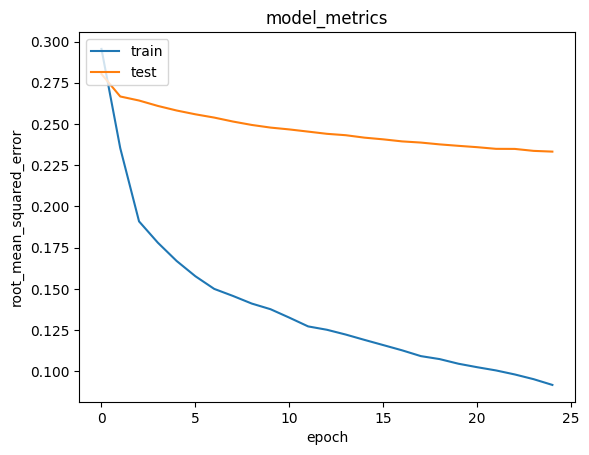

In [48]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi

In [74]:
df1 = df1
df2 = df2

Pada cell code di bawah ini, kita akan mengambil user_id secara acak dari rating_dataset. Dari user_id ini kita perlu mengetahui buku - buku apa saja yang pernah dibaca dan yang belum pernah dibaca, sehingga kita hanya dapat merekomendasikan buku - buku yang belum dibaca.

In [75]:
user_id = df2.user_id.sample(1).iloc[0]
books_have_been_read_by_user = df2[df2.user_id == user_id]

books_have_not_been_read_by_user = df1[df1['book_ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['book_ISBN']
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)

books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

Pada code cell terakhir di bawah ini, kita akan merekomendasikan 10 buku dari user

In [76]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]

top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

books_row = df1[df1['book_ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, ':', row.book_author)

print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)

recommended_books = df1[df1['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Daughter of the Blood (Black Jewels Trilogy) : Anne Bishop
Queen of the Darkness (Black Jewels Trilogy) : Anne Bishop
The Hobbit and The Lord of the Rings : J.R.R. TOLKIEN
Easy to Love, Difficult to Discipline: The Seven Basic Skills for Turning Conflict into Cooperation : Rebecca Anne Bailey
Women's Bodies, Women's Wisdom: Creating Physical and Emotional Health and Healing : Christiane Northrup
--------------------------------
Top 10 Book Recommendation for user: 2033
--------------------------------
Ender's Game (Ender Wiggins Saga (Paperback)) : Orson Scott Card
Arrows of the Queen ( The Heralds of Valdemar, Book 1) : Mercedes Lackey
Kushiel's Dart : Jacqueline Carey
Queen of the Darkness (Black Jewels Trilogy) : Anne Bishop
The Hobbit and The Lord of the Rings : J.R.R. TOLKIEN
Winds of Fate (The Mage Winds, Book 1) : Mercedes Lackey
Sword of Ice: And Other Tales of Valdemar (Daw Book Collectors) : Mercedes Lackey
Winds of Fury (The Mage Winds, 

In [83]:
# Ambil semua buku yang pernah diberi rating oleh user
user_actual_ratings = df2[df2['user_id'] == user_id]

# Buku yang dianggap relevan = rating >= 4
relevant_books = user_actual_ratings[user_actual_ratings['rating'] >= 8]['ISBN'].tolist()

# Precision@10: Berapa dari rekomendasi yang memang relevan
relevant_recommendations = [book for book in recommended_book_ids if book in relevant_books]
precision_at_10 = len(relevant_recommendations) / 10

print(f'\nPrecision@10 untuk user {user_id}: {precision_at_10 * 100:.2f}% ({len(relevant_recommendations)} dari 10 rekomendasi relevan)')



Precision@10 untuk user 2033: 100.00% (10 dari 10 rekomendasi relevan)
